In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
creditdata=pd.read_csv('creditcard.csv')

In [3]:
print(creditdata.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

In [4]:
creditdata['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
creditdata['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Freq')

Text(0,0.5,'Freq')

In [7]:
plt.hist(creditdata['Amount'],bins='auto',histtype='bar')

(array([  4.86690000e+04,   1.34030000e+04,   1.34050000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  0.00000000e+00,   2.17537341e+00,   4.35074682e+00, ...,
          2.56868093e+04,   2.56889846e+04,   2.56911600e+04]),
 <a list of 11810 Patch objects>)

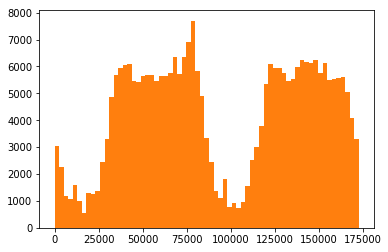

In [15]:
plt.hist(creditdata['Time'],bins= 'auto',histtype='bar')
plt.show()

In [10]:
from sklearn.preprocessing import scale
creditdata['Scaled_Amount']=scale(creditdata[['Amount']])

In [11]:
creditdata['Scaled_Time']=scale(creditdata[['Time']])

In [13]:
creditdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Amount,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [16]:
creditdata=creditdata.drop(['Amount','Time'],axis=1)

In [18]:
len(creditdata[creditdata.Class==1])

492

In [19]:
no_of_frauds=492

In [20]:
no_of_normal=len(creditdata[creditdata.Class==1])

In [21]:
fraud_indices=creditdata[creditdata.Class==1].index

In [22]:
print(fraud_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [25]:
creditdata.Class.unique()

array([0, 1], dtype=int64)

In [27]:
creditdata.Scaled_Time.unique()

array([-1.99658302, -1.99656197, -1.99654091, ...,  1.64195244,
        1.6419735 ,  1.64205773])

In [28]:
normal_indices=creditdata[creditdata.Class==0].index

In [29]:
undersam_normal_indices = np.random.choice(normal_indices, no_of_frauds, replace = False)

In [30]:
undersam_indices=np.concatenate([fraud_indices,undersam_normal_indices])

In [34]:
newdata=creditdata.loc[undersam_indices,:]
#so now we have a balanced data set, we chose random indices from the class 0 and then concatenated it with the fraud indices so then we took that indices and created a new data set on which we will do the further processing.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,precision_score

C:\Users\Ghanshyam\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
x = creditdata.ix[:,creditdata.columns!='Class']
y = creditdata.ix[:,creditdata.columns=='Class']
x_undersample = newdata.ix[:,newdata.columns!='Class']
y_undersample = newdata.ix[:,newdata.columns=='Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_under_train,x_under_test,y_under_train,y_under_test=train_test_split(x_undersample,y_undersample,test_size=0.3,random_state=0)

C:\Users\Ghanshyam\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Ghanshyam\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [37]:
lr=LogisticRegression(C=0.01)


In [38]:
lr.fit(x_under_train,y_under_train.values.ravel())##ravel to convert shape of y to array

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_under_predict =lr.predict(x_under_test)
recall=recall_score(y_under_test.values,y_under_predict)
recall

0.93197278911564629

In [50]:
y_predict=lr.predict(x_test)
recall1=recall_score(y_test.values,y_predict)

In [51]:
print(recall1)

0.945578231293


In [52]:
precision=precision_score(y_under_predict,y_under_test.values)
print(precision)

0.931972789116


In [54]:
precision1=precision_score(y_predict,y_test.values)
print(precision1)

0.945578231293


In [55]:
confusionmatrix = confusion_matrix(y_under_test,y_under_predict)

In [56]:
print(confusionmatrix)

[[142   7]
 [ 10 137]]


In [57]:
y_under_pred_score = lr.fit(x_under_train,y_under_train.values.ravel()).decision_function(x_under_test.values)
fpr,tpr,thresholds= roc_curve(y_under_test.values.ravel(),y_under_pred_score)
auc_graph = auc(fpr,tpr)

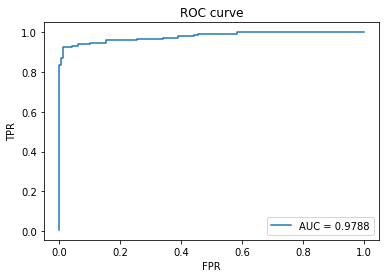

In [58]:
plt.plot(fpr,tpr,label='AUC = %0.4f'% auc_graph)
plt.legend()
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [59]:

from sklearn.tree import DecisionTreeClassifier

In [61]:
dt=DecisionTreeClassifier()

In [62]:
dt.fit(x_under_train,y_under_train.values.ravel())
y_under_predict_tree =lr.predict(x_under_test)
recall_tree=recall_score(y_under_test.values,y_under_predict_tree)

In [63]:
print(recall_tree)

0.931972789116


In [64]:
dt.fit(x_train,y_train.values.ravel())
y_predict_tree =lr.predict(x_test)
recall_tree1=recall_score(y_test.values,y_predict_tree)
print(recall_tree1)

0.945578231293


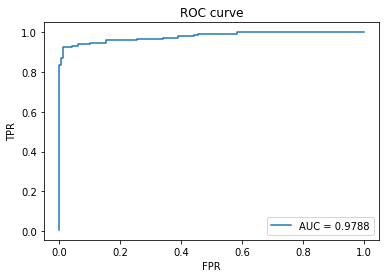

In [65]:
y_under_pred_score_tree = lr.fit(x_under_train,y_under_train.values.ravel()).decision_function(x_under_test.values)
fprt,tprt,thresholdst= roc_curve(y_under_test.values.ravel(),y_under_pred_score_tree)
auc_graph_tree = auc(fprt,tprt)
plt.plot(fprt,tprt,label='AUC = %0.4f'% auc_graph_tree )
plt.legend()
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [66]:
confusionmatrixt = confusion_matrix(y_under_test,y_under_predict_tree)
print(confusionmatrixt)

[[142   7]
 [ 10 137]]


In [73]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
#this package is specially for the unbalanced dataset.

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl


You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [74]:
sm = SMOTE(sampling_strategy='auto', random_state=None) ##higher values of prop of majority giving lower recall
x_res, y_res = sm.fit_resample(x, y.values.ravel())

In [75]:
x_res_train,x_res_test,y_res_train,y_res_test=train_test_split(x_res,y_res,test_size=0.3,random_state=0)

In [76]:
lr.fit(x_res_train,y_res_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
y_res_predict =lr.predict(x_res_test)
recall_res=recall_score(y_res_test,y_res_predict)
recall_res

0.91732324947024602

In [78]:
y_predict_smote =lr.predict(x_test)
recall_res1=recall_score(y_test,y_predict_smote)
recall_res1

0.92517006802721091

In [79]:
confusionmatrix_smote = confusion_matrix(y_res_test,y_res_predict)
print(confusionmatrix_smote)

[[83075  2097]
 [ 7062 78355]]


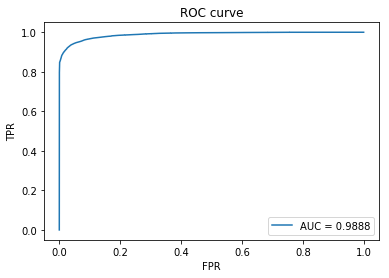

In [80]:
y_res_pred_score = lr.fit(x_res_train,y_res_train).decision_function(x_res_test)
fpr_smote,tpr_smote,thresholds_smote= roc_curve(y_res_test,y_res_pred_score)
auc_graph_smote = auc(fpr_smote,tpr_smote)
plt.plot(fpr_smote,tpr_smote,label='AUC = %0.4f'% auc_graph_smote)
plt.legend()
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()